![Mandel.png](Mandel.png)

The Mandelbrot Set
===

The Mandelbrot set is a well known mathematical object. You can read about it on [Wikipedia](http://en.wikipedia.org/wiki/Mandelbrot_set). There are also "deep zooms" on YouTube exploring never before seen regions of the set.

We're going to explore how to plot it.

---

[0]: http://en.wikipedia.org/wiki/Mandelbrot_set

In [2]:
# necessary imports
%matplotlib inline
#import numpy as np
import pylab as plt
import cupy as np
np.cuda.Device(0).use()

In [3]:
!nvidia-smi

Mon Feb 24 15:26:05 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 440.33.01    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:3B:00.0 Off |                    0 |
| N/A   27C    P0    55W / 300W |     11MiB / 16160MiB |      6%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

Below, we're defining the python function that will apply the Mandelbrot map:

$$f_{n+1} = f_n^2 + z,\qquad f_0 = 0, \qquad n\in\mathbb{N},z\in\mathbb{C}.$$

For a given complex number $z$, $z$ is a member of the Mandelbrot set if and only if the magnitude of $z$ stays bounded as $n\to\infty$.

In [4]:
def f(z, n=100, power=2):
    f = z
    for i in range(1,n):
        f = f**power + z
    return f

The python function above is evaluated on a grid defined in the next cell. The density of this grid has a quadratic effect on the computation time (up until a critical $N$).

In [5]:
N = 5000
x = np.linspace(-1.7,0.6, N)
y = np.linspace(-1.4,1.4, N)
X,Y = np.meshgrid(x,y,indexing='ij')
# Complex Domain
Z = X+1j*Y

Below comes the loop that evaluates the function `f` on the previously defined grid. This is the part of the program that takes time.

  N  | Wall Time | Machine 
----:|:---------:|:--------
  50 |    2.4 ms | s72-2
 500 |   97.1 ms | s72-2
5000 |   24.1 s  | s72-2

In [6]:
%%time
data = f(Z,power=2)

CPU times: user 12.1 ms, sys: 5.5 ms, total: 17.6 ms
Wall time: 22.2 ms


Finally, we can plot the computed boundaries of the Mandelbrot set with the following code.

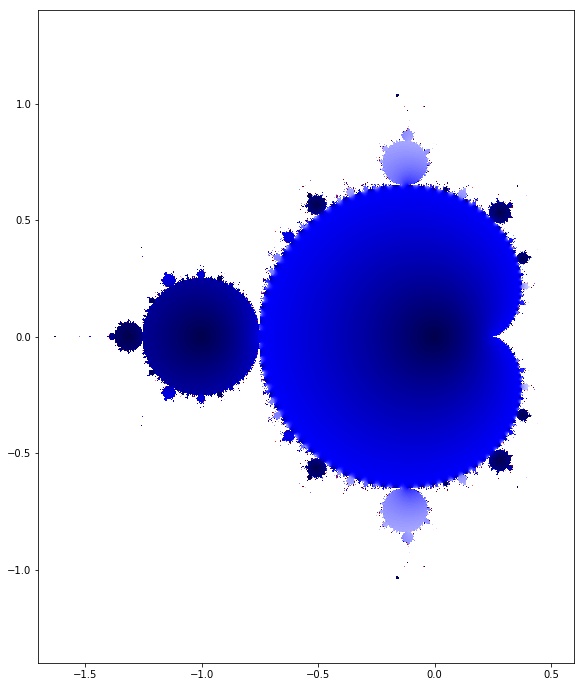

In [7]:
D = np.asnumpy(np.abs(data.T))
extent = (x[0],x[-1],y[0],y[-1])
plt.figure(figsize=(16,12))
plt.imshow(D, vmin=0,vmax=2,cmap=plt.cm.seismic,extent=extent)